# LC Circuit

The LC circuit is the most fundamental example. It behaves like a quantum harmonic oscillator in the quantum regime. We can test this fundamental property here.

In [1]:
import circuitq as cq
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#### Circuit graph

<img src="circuit_figures/lc_circuit.png" alt="LC Circuit" width="200"/>

The circuit consists of a linear inductance with a shunted capacity.

In [2]:
graph = nx.MultiGraph()
graph.add_edge(0,1, element = 'C')
graph.add_edge(0,1, element = 'L');

#### Symbolic Hamiltonian

The symbolic Hamiltonian contains a harmonic potential.

In [3]:
circuit = cq.CircuitQ(graph)
circuit.h

\Phi_{1}**2/(2*L_{010}) + 0.5*q_{1}**2/C_{01}

\Phi_{1}**2/(2*L_{010}) + 0.5*q_{1}**2/C_{01}

#### Diagonalization

In [4]:
h_num = circuit.get_numerical_hamiltonian(200)
eigv, eigs = circuit.get_eigensystem()

As the LC circuit represents the circuit analog of a quantum harmonic oscillator, it's eigenenergies should be spaced by $\hbar \omega$ with the angular frequency $\omega = \frac{1}{\sqrt{LC}}$. We indicate these equidistant energies with horizontal lines below and plot the eigenvalues on top of them.

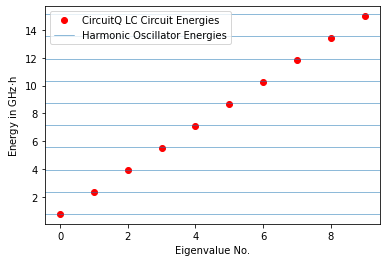

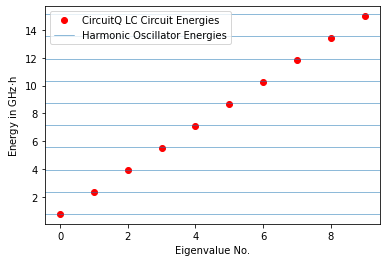

In [5]:
n_energies = 10
h = 6.62607015e-34 
y_scaling = 1/(h *1e9)
plt.plot(np.arange(n_energies), eigv[:n_energies]*y_scaling, 
         'ro', label='CircuitQ LC Circuit Energies')
omega = 1/np.sqrt(circuit.c_v["L"]*circuit.c_v["C"])
plt.axhline(eigv[0]*y_scaling, lw=0.5, label='Harmonic Oscillator Energies')
for n in range(1,n_energies):
    plt.axhline((eigv[0]+n*circuit.hbar*omega)*y_scaling, lw=0.5)
plt.xlabel("Eigenvalue No.")
plt.ylabel(r"Energy in GHz$\cdot$h")
plt.legend()
plt.show()

The eigenstates should have the shape of Hermite functions. Let's plot the square of their absolute value.

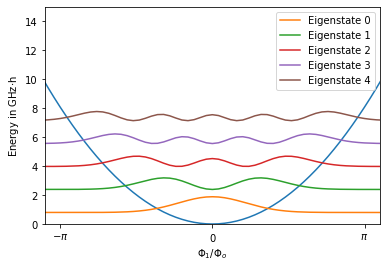

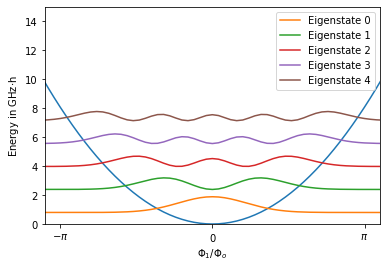

In [6]:
plt.plot(circuit.flux_list, np.array(circuit.potential)*y_scaling, lw=1.5)
for n in range(5):
    plt.plot(circuit.flux_list, 
            (eigv[n]+(abs(eigs[:,n])**2)*1e-23)*y_scaling,
            label="Eigenstate " + str(n))
plt.xticks(np.linspace(-1*np.pi, 1*np.pi, 3)*circuit.phi_0 ,
           [r'$-\pi$',r'$0$',r'$\pi$'])
plt.xlabel(r"$\Phi_1 / \Phi_o$")
plt.ylabel(r"Energy in GHz$\cdot$h")
plt.xlim(-1.1*np.pi*circuit.phi_0, 1.1*np.pi*circuit.phi_0)
plt.ylim(0,15)
plt.legend()
plt.show()